
<div dir=ltr align=center>

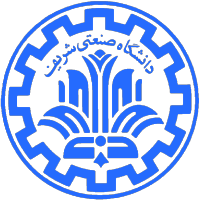

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Clustering: K-Means Clustering<br>
<font color=696880 size=4>
    Prepared by Benyamin Ghanbari <br>

<font color=696880 size=2>
    Curated by Alireza Mirshafieian

____

# Student Information

In [7]:
student_number = '402171075'
full_name = 'Parsa Malekian'

### Image Segmentation Using K-Means Clustering for Color-Based Region Extraction

### Description: 

In this project, you will implement **K-Means clustering from scratch** and use it to perform image segmentation based on color similarity. **Image segmentation** is the process of dividing an image into meaningful regions. In this assignment, segmentation is done using **color clustering**, where every pixel is grouped into one of K color clusters.

**⚠️ Notice:** You are allowed to use **only the imported libraries** and must **follow the provided function structure**.



# 📝 **Project Instructions**

1. **Load the image**  
   Load the input image and convert it into an **RGB numerical array**.

2. **Reshape image to pixels**  
   Flatten the image into a **2D array**, where each row represents one pixel (**R, G, B**).

3. **Initialize K cluster centers**  
   Randomly select **K pixels** to serve as the starting cluster centers.

4. **Assign pixels to nearest cluster**  
   Compute **distances** and assign each pixel to the **closest cluster center**.

5. **Update cluster centers**  
   Recalculate each center as the **mean color** of all pixels assigned to that cluster.

6. **K-Means algorithm**  
   Repeat **assignment** and **update steps** until **convergence** or **max iterations**.

7. **Reconstruct segmented image**  
   Replace each pixel with the **color of its assigned cluster center**.

8. **Using the Elbow Method**  
   Compute the Compute Within-Cluster Sum of Squares **WCSS** for various **K values** to help estimate an **optimal K**.

9. **Run the segmentation**  
   Apply your **full K-Means pipeline** to segment the chosen image.

10. **Display results**  
    Plot and **visualize** the original and segmented images **side-by-side**.


# 📤 **Expected Output**

- A **segmented image** produced by your **K-Means implementation**  
- A **plot showing the Elbow Method curve** (**WCSS vs. K**)  
- **Observe** how changing **K** affects segmentation


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
def load_image(path):
    img = Image.open(path)
    data = np.array(img)
    return data


def preprocess_image(image_data):
    h, w, c = image_data.shape
    pixels = image_data.reshape(-1, c).astype(np.float64)
    return pixels


In [10]:
def initialize_centers(pixels, k):
    indices = np.random.choice(len(pixels), k, replace=False)
    centers = pixels[indices].copy()
    return centers


def assign_clusters(pixels, centers):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels


def update_centers(pixels, labels, k):
    new_centers = []
    for i in range(k):
        cluster_pixels = pixels[labels == i]
        if len(cluster_pixels) > 0:
            new_centers.append(cluster_pixels.mean(axis=0))
        else:
            new_centers.append(pixels[np.random.randint(len(pixels))])
    return np.array(new_centers)


def kmeans(pixels, k, max_iters=10, tol=1e-4):
    centers = initialize_centers(pixels, k)
    for _ in range(max_iters):
        labels = assign_clusters(pixels, centers)
        new_centers = update_centers(pixels, labels, k)
        if np.linalg.norm(new_centers - centers) < tol:
            break
        centers = new_centers
    return centers, labels

In [11]:
def recreate_image(labels, centers, image_shape):
    segmented = centers[labels].reshape(image_shape).astype(np.uint8)
    return segmented

In [12]:
def calculate_wcss(pixels, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        centers, labels = kmeans(pixels, k)
        total = 0
        for i in range(k):
            cluster_pixels = pixels[labels == i]
            total += np.sum((cluster_pixels - centers[i]) ** 2)
        wcss.append(total)
    return wcss


def plot_elbow(wcss):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
    plt.xlabel('K')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()


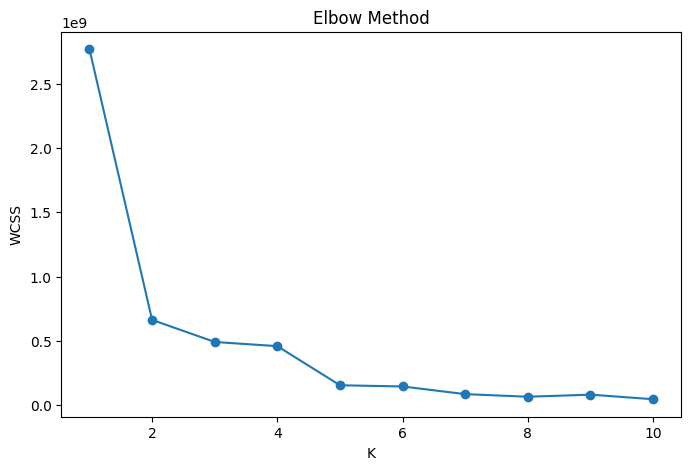

In [13]:
image_path = 'shrek.jpg'
image_data = load_image(image_path)
pixels = preprocess_image(image_data)

wcss = calculate_wcss(pixels, max_k=10)
plot_elbow(wcss)

k = 5
centers, labels = kmeans(pixels, k)
segmented_image = recreate_image(labels, centers, image_data.shape)


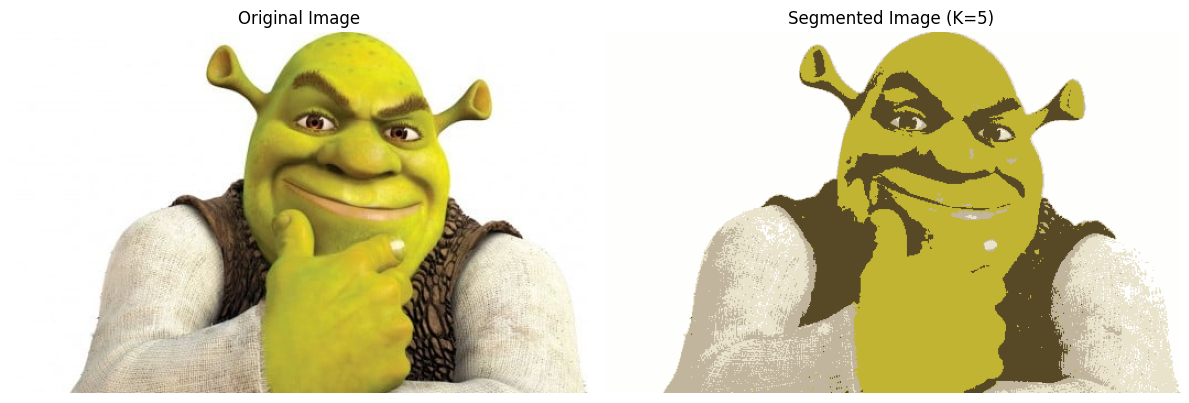

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_data)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmented_image)
axes[1].set_title(f'Segmented Image (K={k})')
axes[1].axis('off')
plt.tight_layout()
plt.show()
